In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
email = pd.read_csv('emails.csv')

In [13]:
email.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [14]:
len(email)

5728

In [15]:
email.isna().sum()

text    0
spam    0
dtype: int64

In [16]:
email.shape

(5728, 2)

In [17]:
## Cleaning the text

In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(email)):
    if (i%100 == 0):
        print(i)
    e_mail = re.sub('[^a-zA-Z]', ' ', email['text'][i])
    e_mail = e_mail.split()
    ps = PorterStemmer()
    e_mail = [ps.stem(word) for word in e_mail if not word in set(stopwords.words('english'))]
    e_mail = ' '.join(e_mail)
    corpus.append(e_mail)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pagya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700


In [24]:
len(corpus)

5728

In [23]:
##Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = email['spam']
print(len(X))
print(X.shape)
print(len(y))

5728
(5728, 25607)
5728


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [26]:
from sklearn.naive_bayes import GaussianNB
GN_classifier = GaussianNB()
GN_classifier.fit(X_train, y_train)


GaussianNB()

In [27]:
GN_score = GN_classifier.score(X_test,y_test)
GN_score

0.9607329842931938

In [28]:
# Predicting the Test set results
y_GN_pred = GN_classifier.predict(X_test)
y_GN_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
from sklearn.naive_bayes import MultinomialNB
MN_classifier = MultinomialNB()
MN_classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
MN_score = MN_classifier.score(X_test,y_test)
MN_score

0.9825479930191972

In [31]:
y_MN_pred = MN_classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
GN_cm = confusion_matrix(y_test, y_GN_pred)
print(GN_cm)

MN_cm = confusion_matrix(y_test, y_MN_pred)
print(MN_cm)

[[875  10]
 [ 35 226]]
[[870  15]
 [  5 256]]


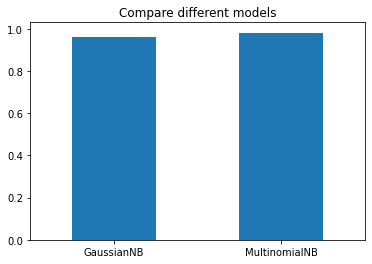

In [33]:
models = pd.DataFrame({"GaussianNB": GN_score,
                           "MultinomialNB": MN_score
                           },
                          index=[0])

models.T.plot.bar(title="Compare different models",
                      legend=False)
plt.xticks(rotation=0);

In [34]:
import pickle
pickle.dump(MN_classifier,open("Email_spam_naive_bayes_MN.pkl","wb"))